# Model 040 coupled steady state solution

This notebook is for the EMS paper. It will have a model040 (basic stream power with Taylor diffusion hillslopes) landscape at steady state. There will be two outputs from this notebook: 1) a NetCDF file of the topography, which we will use to make an oblique Paraview image of the landscape, and 2) a slope-area plot at steady state.

Importantly, this will be one of the "user-friendly" notebooks that get submitted along with the EMS paper.

#### Charlie working on

In [1]:
import numpy as np
from erosion_model import BasicCh
import matplotlib.pyplot as plt
from landlab import imshow_grid
import matplotlib
from matplotlib import ticker
import matplotlib.pyplot as plt

//anaconda/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [2]:
#parameter dictionary
params = {'number_of_node_rows' : 100,
         'number_of_node_columns' : 160,
         'node_spacing' : 10.0,
         'east_boundary_closed' : False,
         'north_boundary_closed' : False,
         'west_boundary_closed' : False,
         'south_boundary_closed' :False,
         'dt' : 10,
         'K_sp' : 0.001,
         'm_sp' : 0.5,
         'n_sp' : 1.0,
         'linear_diffusivity' : 0.1,
         'slope_crit' : 0.3,
         'outlet_lowering_rate' : 0.0005,
         'output_filename': 'model_040_output'
         }
#rachel had used ld = 1.0

In [3]:
ch = BasicCh(params=params)
tolerance = 0.0001
dt = 10.

In [4]:
elapsed_time = 0
keep_running = True
while keep_running == True:
    ch.run_one_step(dt)
    
    pre_topo = ch.grid.at_node['topographic__elevation'][ch.grid.core_nodes]
    ch.run_one_step(dt)
    post_topo = ch.grid.at_node['topographic__elevation'][ch.grid.core_nodes]
    if elapsed_time % 1000 == 0:
        print elapsed_time
        print 'MAX: ', max(abs(pre_topo - post_topo))
        print 'MEAN: ', np.average(abs(pre_topo - post_topo))
    elapsed_time += dt
    if max(abs(pre_topo - post_topo)) <= tolerance: #1mm
        keep_running = False
    
    #####BELOW IS RACHEL'S STEADY-STATE CONDITION
    #slope1 = np.copy(basic.grid.at_node['topographic__steepest_slope'][101])
    #slope2 = np.copy(basic.grid.at_node['topographic__steepest_slope'][198])
    
    #if elapsed_time % 10000 == 0:
    #    print elapsed_time
        
    #elapsed_time += dt
    
    #if abs((slope1-steady_S)) <= tolerance and abs((slope2-steady_S)) <= tolerance:
    #    keep_running = False

0
MAX:  0.0858213360908
MEAN:  0.0127465187162
1000.0
MAX:  0.00621127816961
MEAN:  0.00350307836376
2000.0
MAX:  0.0111732477449
MEAN:  0.00250950430911
3000.0
MAX:  0.00649925563582
MEAN:  0.00156571003819
4000.0
MAX:  0.0157380123042
MEAN:  0.000957578399447
5000.0
MAX:  0.00576593488526
MEAN:  0.000656647210602
6000.0
MAX:  0.00780942363922
MEAN:  0.000554319303779
7000.0
MAX:  0.0105144733618
MEAN:  0.00056040922336
8000.0
MAX:  0.00824836611851
MEAN:  0.000477229338889
9000.0
MAX:  0.00563455891818
MEAN:  0.000419581570463
10000.0
MAX:  0.00993698192917
MEAN:  0.000406402257537
11000.0
MAX:  0.00437611894577
MEAN:  0.000342769958761
12000.0
MAX:  0.00402287761138
MEAN:  0.00027797632663
13000.0
MAX:  0.00336623319221
MEAN:  0.000239200335866
14000.0
MAX:  0.00303928688725
MEAN:  0.000216167586722
15000.0
MAX:  0.00528157617569
MEAN:  0.000183855070191
16000.0
MAX:  0.00242028860198
MEAN:  0.00016400825247
17000.0
MAX:  0.00256753124936
MEAN:  0.000159941860536
18000.0
MAX:  0.003

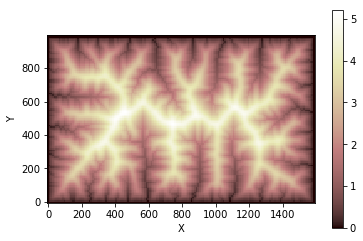

In [5]:
%matplotlib inline
imshow_grid(ch.grid, 'topographic__elevation')

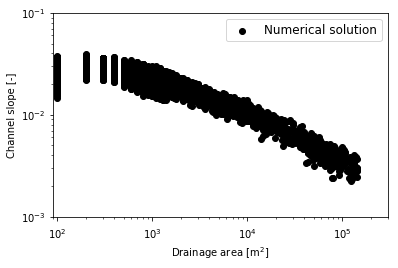

In [6]:
###MAKE SLOPE-AREA PLOT

import matplotlib

#assign area_array and slope_array
area_array = ch.grid.at_node['drainage_area'][(ch.grid.node_x > 10)&(ch.grid.node_x < 1580)&(ch.grid.node_y >10)&(ch.grid.node_y<980)]
slope_array = ch.grid.at_node['topographic__steepest_slope'][(ch.grid.node_x > 10)&(ch.grid.node_x < 1580)&(ch.grid.node_y >10)&(ch.grid.node_y<980)]

##instantiate figure and plot
fig = plt.figure(figsize=(6, 3.75))
slope_area = plt.subplot()

#plotting param
matplotlib.rcParams.update({'font.size': 20})

#create an array for the detachment-limited analytical solution
u = 0.0005 #m/yr, uplift or baselevel lowering rate
k = 0.001 #fluvial erodibility
m = 0.25 #discharge exponent
n = 1.0 #slope exponent

#calculate analytical slope from area field
#analytical_slope_array = np.power((u / k), 1 / n) * np.power(area_array, -m/n)

#plot the analytical solution
#slope_area.plot(area_array, analytical_slope_array, linestyle='-',
#                color='grey', linewidth = 1, label = 'Analytical solution')

#plot the data
slope_area.scatter(area_array, slope_array, marker='o', c='k', 
                   label = 'Numerical solution') #plot HA data
                   
#make axes log and set limits
slope_area.set_xscale('log')
slope_area.set_yscale('log')

slope_area.set_xlim(9*10**1, 3*10**5)
slope_area.set_ylim(1e-3, 1e-1)

#set x and y labels
slope_area.set_xlabel(r'Drainage area [m$^2$]')
slope_area.set_ylabel('Channel slope [-]')
slope_area.legend(scatterpoints=1,prop={'size':12})
slope_area.tick_params(axis='x', which='major', pad=7)

fig.savefig('maintext_taylor_hillslopes_slope_area.eps',bbox_inches='tight', dpi=1000) #save figure

In [7]:
#export NetCDF for Paraview image of topography
from landlab.io.netcdf import write_netcdf
write_netcdf('maintext_taylor_hillslopes.nc', ch.grid, format='NETCDF3_64BIT', names='topographic__elevation')